My First Project

In [2]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import datetime as dt
from talib import RSI
import matplotlib.pyplot as plt
from datetime import timedelta


In [3]:
# we will try to get last 10 year data for : BANKNIFTY INDEX

start_date = dt.datetime(2011,1,1)
end_date = dt.datetime(2020,5,1)
data = pdr.get_data_yahoo("^NSEBANK",start_date,end_date)

In [4]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-24,19950.150391,19515.400391,19697.650391,19586.650391,305700.0,19586.650391
2020-04-27,20224.750000,19847.650391,19870.800781,20081.150391,299900.0,20081.150391
2020-04-28,20751.300781,20260.800781,20436.599609,20671.099609,367800.0,20671.099609
2020-04-29,21348.150391,20393.650391,20440.400391,21090.199219,400600.0,21090.199219
2020-04-30,21967.000000,21353.650391,21589.199219,21534.500000,471500.0,21534.500000


In [5]:
# now we will save this data to excel file to use it in future

data.to_excel("BN_10_year_data.xlsx")

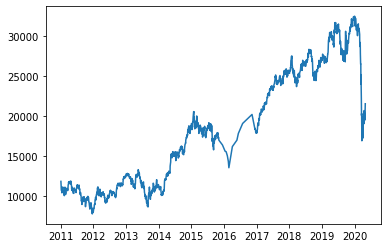

In [6]:
# now we will plot the bank nifty close price chart for last 10 year


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

close = data["Close"].values

fig = plt.figure()
x = data.index
y = close
plt.plot(x,y)

In [7]:
# now we will add RSI to data and save it in updated excel file

data["RSI"] = RSI(close,timeperiod = 14)
data.to_excel("BN_10_year_data.xlsx")

In [37]:
signal = (data["RSI"]<40)
signal[0]=False
data["signal_RSI"] = signal
data["PnL"] = 0
data["PnL"][signal] = (data["Open"] - data["Close"])[signal]
data.head(50)

C:\Users\Hardik\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,High,Low,Open,Close,Volume,Adj Close,RSI,signal,signal_RSI,PnL
Date,,,,,,,,,,
2011-01-03,11912.150391,11826.950195,11882.099609,11855.750000,0.0,11855.750000,NaN,-,False,0.000000
2011-01-04,11872.799805,11545.549805,11868.400391,11564.049805,0.0,11564.049805,NaN,-,False,0.000000
2011-01-05,11545.750000,11265.549805,11545.750000,11305.450195,0.0,11305.450195,NaN,-,False,0.000000
2011-01-06,11377.099609,11164.750000,11350.700195,11186.799805,0.0,11186.799805,NaN,-,False,0.000000
2011-01-07,11258.500000,11007.900391,11146.450195,11053.349609,0.0,11053.349609,NaN,-,False,0.000000
2011-01-10,11072.700195,10671.599609,11024.500000,10700.650391,0.0,10700.650391,NaN,-,False,0.000000
2011-01-11,10951.200195,10620.799805,10734.200195,10833.549805,0.0,10833.549805,NaN,-,False,0.000000
2011-01-12,11161.150391,10728.450195,10906.400391,11128.150391,0.0,11128.150391,NaN,-,False,0.000000
2011-01-13,11127.950195,10676.500000,11125.950195,10716.650391,0.0,10716.650391,NaN,-,False,0.000000


In [39]:
# now we will try to generate signal from our logic

data = data.dropna()
data["signal"] =" "
for i in data["RSI"]:
    if i > 60:
        data["signal"] = "Buy"
        
    elif i < 40:
            data["signal"] = "Sell"
            
    
    else: data["signal"] = "-"
            
    i = i+1
                  
        


C:\Users\Hardik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Hardik\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Hardik\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [41]:
data.head(50)

,High,Low,Open,Close,Volume,Adj Close,RSI,signal,signal_RSI,PnL
Date,,,,,,,,,,
2011-01-21,10923.700195,10740.000000,10750.400391,10889.400391,0.0,10889.400391,32.372631,-,True,-139.000000
2011-01-24,11177.849609,10913.450195,10923.750000,11151.150391,0.0,11151.150391,38.678795,-,True,-227.400391
2011-01-25,11256.950195,10849.400391,11183.549805,10872.950195,0.0,10872.950195,34.948627,-,True,310.599609
2011-01-27,10970.849609,10639.849609,10946.400391,10676.150391,0.0,10676.150391,32.556701,-,True,270.250000
2011-01-28,10736.400391,10481.099609,10690.049805,10578.250000,0.0,10578.250000,31.405202,-,True,111.799805
2011-01-31,10696.299805,10400.250000,10444.349609,10641.849609,0.0,10641.849609,33.061558,-,True,-197.500000
2011-02-01,10683.450195,10457.799805,10683.450195,10481.200195,0.0,10481.200195,31.023738,-,True,202.250000
2011-02-02,10614.950195,10418.200195,10599.000000,10470.150391,0.0,10470.150391,30.882738,-,True,128.849609
2011-02-03,10704.299805,10429.500000,10460.950195,10670.599609,0.0,10670.599609,36.519136,-,True,-209.649414
